### Setup the Python Environment

In [ ]:
# data operations
import numpy as np
import pandas as pd
import os

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import axes3d

# For regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
#import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf  #Provides a formula-based interface

%matplotlib inline
#plt.style.use('seaborn-white')

homedir=os.environ['HOME'] + '/'
datapath=homedir + 'datasets/'
tvsales="tvmarketing.csv"

### Read the CSV data file

In [ ]:
tvfile=f"{datapath}{tvsales}"
tv_data = pd.read_csv(tvfile)

### Data frame meta data

In [ ]:
tv_data.info()

In [ ]:
# Statistical Meta data
tv_data.describe()

In [ ]:
# Data frame shape (no of rows, columns)
tv_data.shape

In [ ]:
# fetch the column headers - index 0, 1, 2 ...
xhdr=tv_data.columns[0]   # represents C0 => 'TV'
yhdr=tv_data.columns[1]   # represents C1 => 'Sales'

In [ ]:
# retrieve the column data for the 2 columns 'TV' and 'Sales'
meta_tv=tv_data[xhdr]
meta_sales=tv_data[yhdr]

### Visual Data

In [ ]:
# use the column data to plot the scatter diagram
plt.scatter(meta_tv, meta_sales)
plt.xlabel("TV Budget")
plt.ylabel("Sales")
plt.title("TV Budget vs Sales")

### Training and Test Data

In [ ]:
# get TV and Sales data 
tv_col = tv_data[xhdr].values
tv_sales = tv_data[yhdr].values

### SLR Calculation based on Training Data

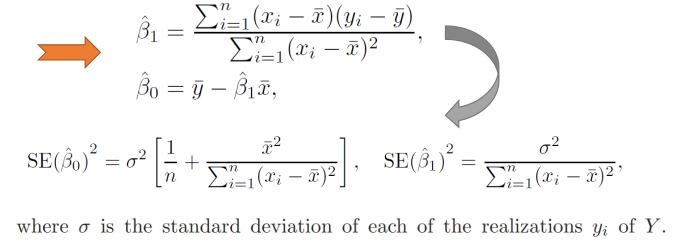

* Using training data, calculate the coefficients 
  - beta0 -> intercept
  - beta1 -> slope

In [ ]:
# split training data based on randomness
from sklearn.model_selection import train_test_split
tv_trn, tv_tst, sales_trn, sales_tst = train_test_split(tv_col, tv_sales, \
                                                        test_size = 0.3, random_state = 1)

In [ ]:
# mean of training data - tv_trn (X), sales_trn (Y)
tv_trn_mean = tv_trn.mean()
sales_trn_mean = sales_trn.mean()
sales_trn_mean

In [ ]:
# Xi - Xmu, Yi - Ymu (numpy arrays)
tv_dev = tv_trn - tv_trn_mean
sales_dev = sales_trn - sales_trn_mean

### Quick check of basics

In [ ]:
# Example - multiplication of 2 Pandas Data frames. Multiplies corresponding indices
a = [ 1, 2, 3, 4, 5 ]
ad = pd.DataFrame(a)
b = [ 4, 5, 6, 7, 8 ]
bd = pd.DataFrame(b)
cd = ad * bd

In [ ]:
# Example - multiplication of 2 numpy arrays. Multiplies corresponding indices
an = np.array(a)
bn = np.array(b)
cn = an * bn
dn = an * an

### Calculate coefficients beta0 (intercept), beta1 (slope)

In [ ]:
tv_numerator = (tv_dev * sales_dev).sum()
tv_denominator = (tv_dev * tv_dev).sum()
beta1 = tv_numerator/tv_denominator  # slope
beta0 = sales_trn_mean - (beta1 * tv_trn_mean) # intercept

### Use coffecients for prediction

In [ ]:
# sales prediction based on slope and intercept calculated.
sales_pred = beta0 + beta1 * tv_tst
sales_pred

### Plot of Observed vs Predicted

In [ ]:
# Observed vs Predicted
import matplotlib.pyplot as plt
c = [i for i in range(0,60,1)]         # generating index 
fig = plt.figure()
plt.plot(c, sales_tst, color="navy", linewidth=2, linestyle="-")
plt.plot(c, sales_pred, color="red",  linewidth=2, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Sales', fontsize=16) 

### Error Metrics

In [ ]:
# Mease squared error
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(sales_tst, sales_pred)
mse

In [ ]:
#r2 score. Value ranges from 0 to 1
r_squared = r2_score(sales_tst, sales_pred)
r_squared